# Uber Rides Data Analysis

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv("/content/UberDataset.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [141]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [142]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [143]:
df["PURPOSE"].fillna("NOT", inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [144]:
df["PURPOSE"].value_counts()

,count
PURPOSE,
NOT,503
Meeting,187
Meal/Entertain,160
Errand/Supplies,128
Customer Visit,101
Temporary Site,50
Between Offices,18
Moving,4
Airport/Travel,3


In [145]:
 df["START_DATE"]=pd.to_datetime(df["START_DATE"], errors="coerce")
 df["END_DATE"]=pd.to_datetime(df["END_DATE"], errors="coerce")

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [147]:
from datetime import datetime

df["date"] = pd.DatetimeIndex(df["START_DATE"]).date
df["time"] = pd.DatetimeIndex(df["START_DATE"]).hour

In [148]:
df["DAY_NIGHT"] = pd.cut(
    x=df["time"],
    bins=[0,10,15,19,24],
    labels=['Morning', "Afternoon", "Evening", "Night"]
    )

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
 7   date        421 non-null    object        
 8   time        421 non-null    float64       
 9   DAY_NIGHT   414 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 82.7+ KB


In [150]:
df = df.dropna()

In [151]:
df = df.drop_duplicates()

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  413 non-null    datetime64[ns]
 1   END_DATE    413 non-null    datetime64[ns]
 2   CATEGORY    413 non-null    object        
 3   START       413 non-null    object        
 4   STOP        413 non-null    object        
 5   MILES       413 non-null    float64       
 6   PURPOSE     413 non-null    object        
 7   date        413 non-null    object        
 8   time        413 non-null    float64       
 9   DAY_NIGHT   413 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 32.9+ KB


In [156]:
obj_cols = df.select_dtypes(include=["object"]).columns

for col in obj_cols:
  print(col, df[col].unique().size)

CATEGORY 2
START 108
STOP 112
PURPOSE 7
date 113


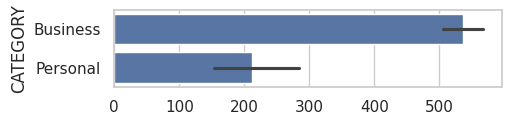

In [164]:
plt.figure(figsize=(5,1))

sns.barplot(df["CATEGORY"])

plt.show()

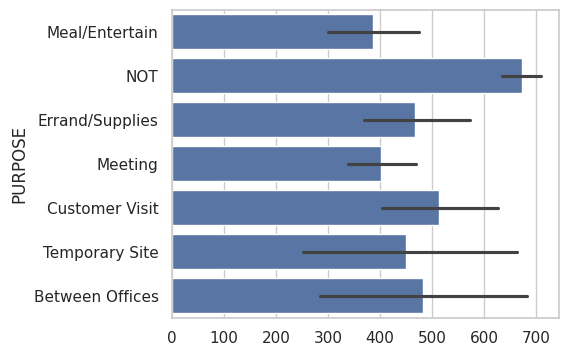

In [163]:
plt.figure(figsize=(5,4))

sns.barplot(df["PURPOSE"])

plt.show()

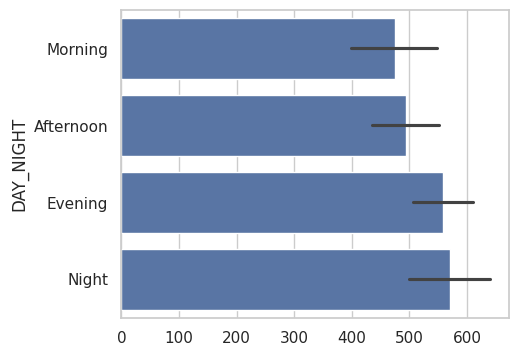

In [165]:
plt.figure(figsize=(5,4))

sns.barplot(df["DAY_NIGHT"])

plt.show()

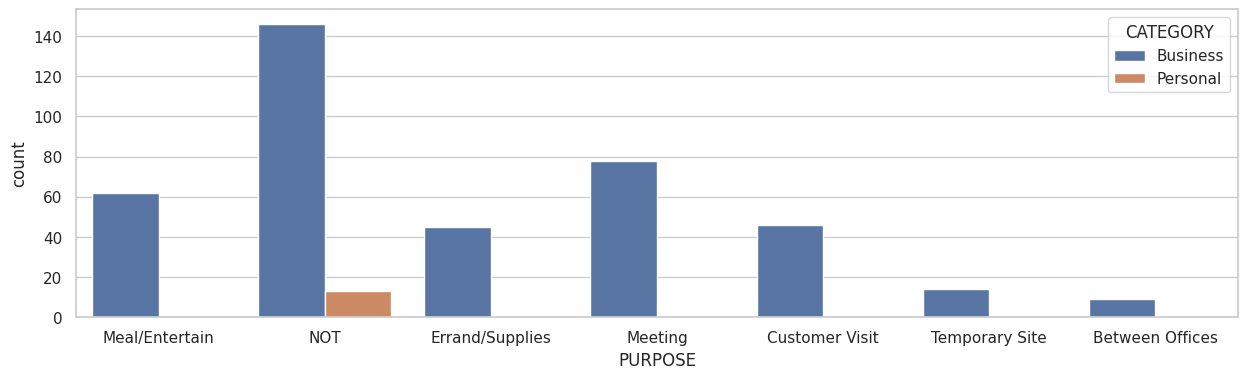

In [167]:
plt.figure(figsize=(15,4))

sns.countplot(data=df, x="PURPOSE", hue="CATEGORY")

plt.show()

In [169]:
from sklearn.preprocessing import OneHotEncoder

object_cols = ['CATEGORY', 'PURPOSE']

OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))

OH_cols.index = df.index

OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df.drop(object_cols, axis=1)
df = pd.concat([df_final, OH_cols], axis=1)

<Axes: >

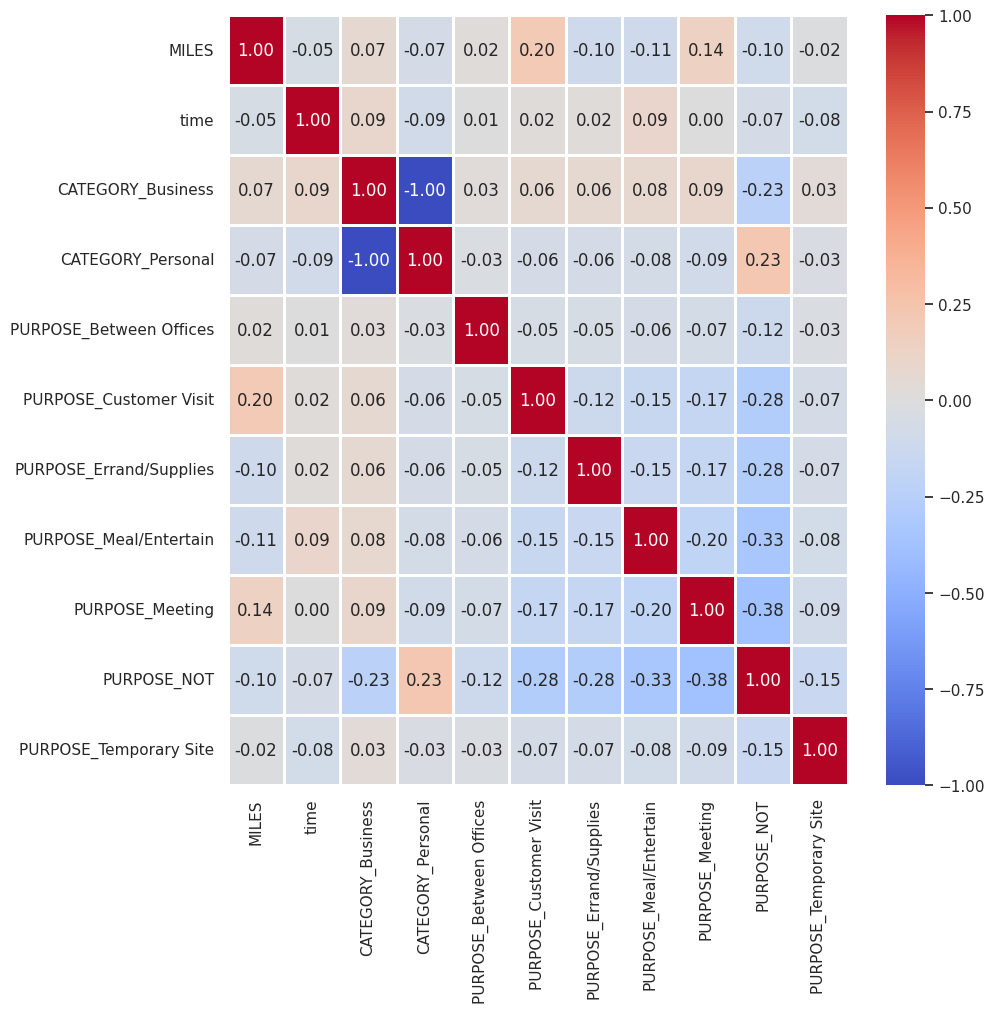

In [171]:
plt.figure(figsize=(10,10))


sns.heatmap(df.select_dtypes(include=['number']).corr(),
            cmap='coolwarm',
            fmt='.2f',
            linewidths=2,
            annot=True)

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

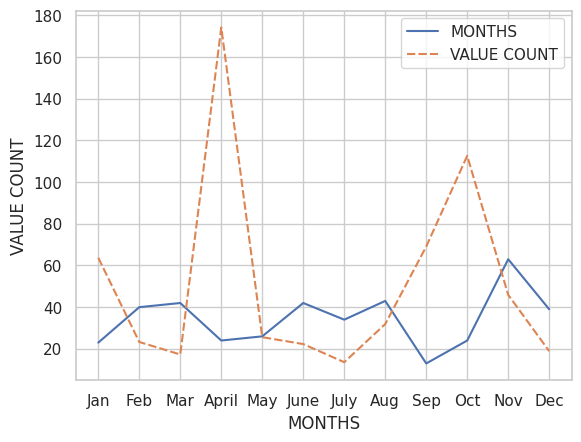

In [173]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
df["MONTH"] = df.MONTH.map(month_label)

mon = df.MONTH.value_counts(sort=False)

dfe = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": df.groupby('MONTH',
                                                  sort=False)['MILES'].max()})

p = sns.lineplot(data=dfe)

p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

In [174]:
df['DAY'] = df.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
df['DAY'] = df['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

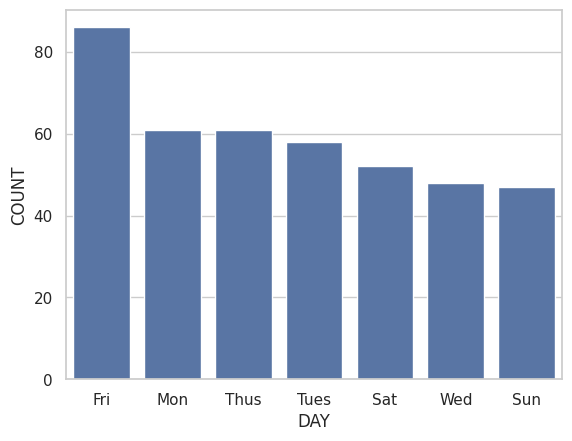

In [175]:
day_label = df.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: ylabel='MILES'>

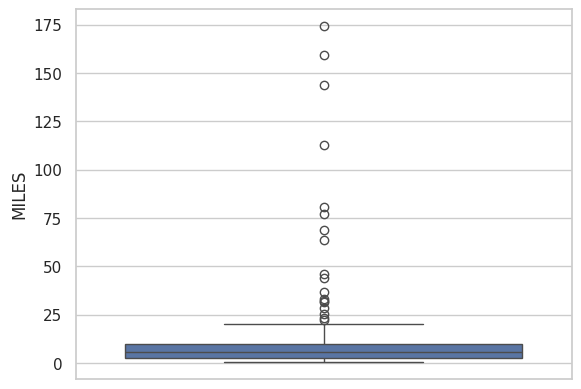

In [176]:
sns.boxplot(df['MILES'])

<Axes: ylabel='MILES'>

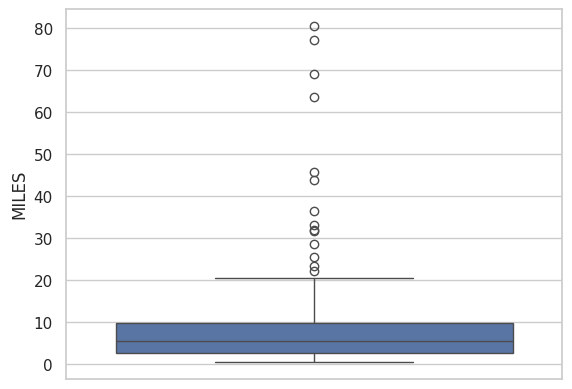

In [177]:
sns.boxplot(df[df['MILES']<100]['MILES'])

<Axes: xlabel='MILES', ylabel='Density'>

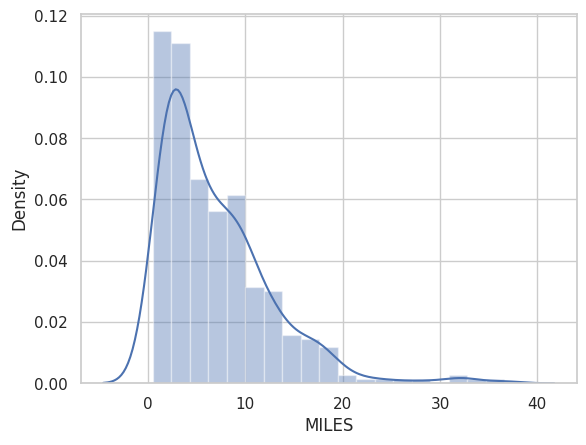

In [178]:
sns.distplot(df[df['MILES']<40]['MILES'])